Loading House Rent Dataset downloaded from "https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset?resource=download"

Dataset have the following description:

BHK: Number of Bedrooms, Hall, Kitchen.

Rent: Rent of the Houses/Apartments/Flats.

Size: Size of the Houses/Apartments/Flats in Square Feet.

Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)

Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.

Area Locality: Locality of the Houses/Apartments/Flats.

City: City where the Houses/Apartments/Flats are Located.

Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.

Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.

Bathroom: Number of Bathrooms.

Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.

In [15]:
import pandas as pd
house_rent_data = pd.read_csv("/content/House_Rent_Dataset.csv")
house_rent_data.info()
house_rent_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Data Visualization and Descriptive Stats

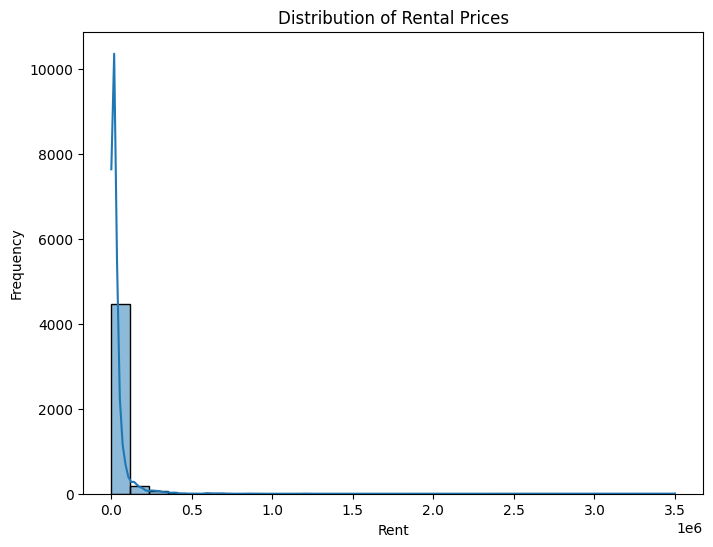

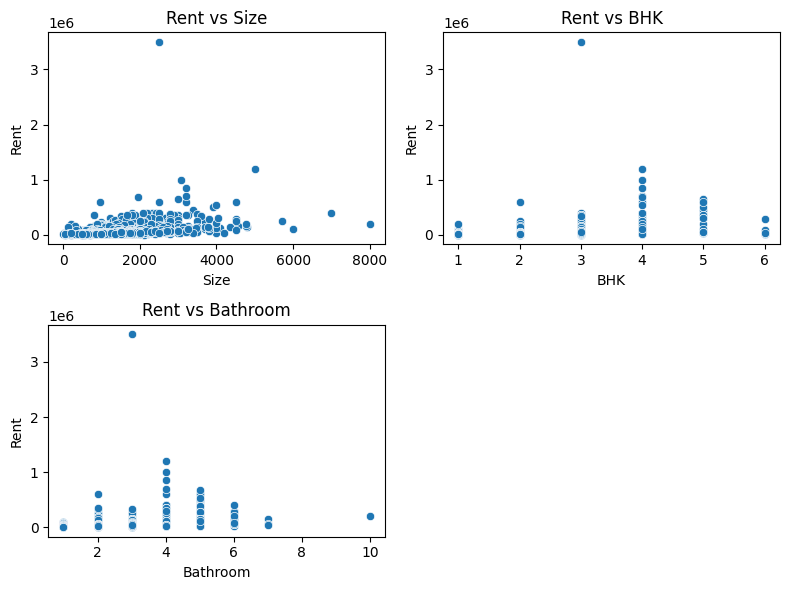

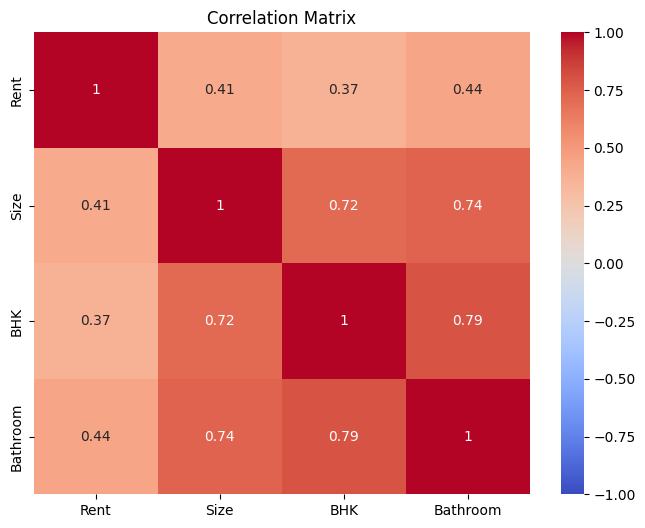

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
desc_stats = house_rent_data.describe()
plt.figure(figsize=(8, 6))
sns.histplot(house_rent_data['Rent'], bins=30, kde=True)
plt.title('Distribution of Rental Prices')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
sns.scatterplot(x='Size', y='Rent', data=house_rent_data)
plt.title('Rent vs Size')
plt.subplot(2, 2, 2)
sns.scatterplot(x='BHK', y='Rent', data=house_rent_data)
plt.title('Rent vs BHK')
plt.subplot(2, 2, 3)
sns.scatterplot(x='Bathroom', y='Rent', data=house_rent_data)
plt.title('Rent vs Bathroom')
plt.tight_layout()
plt.show()
correlation_matrix = house_rent_data[['Rent', 'Size', 'BHK', 'Bathroom']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [11]:
desc_stats

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


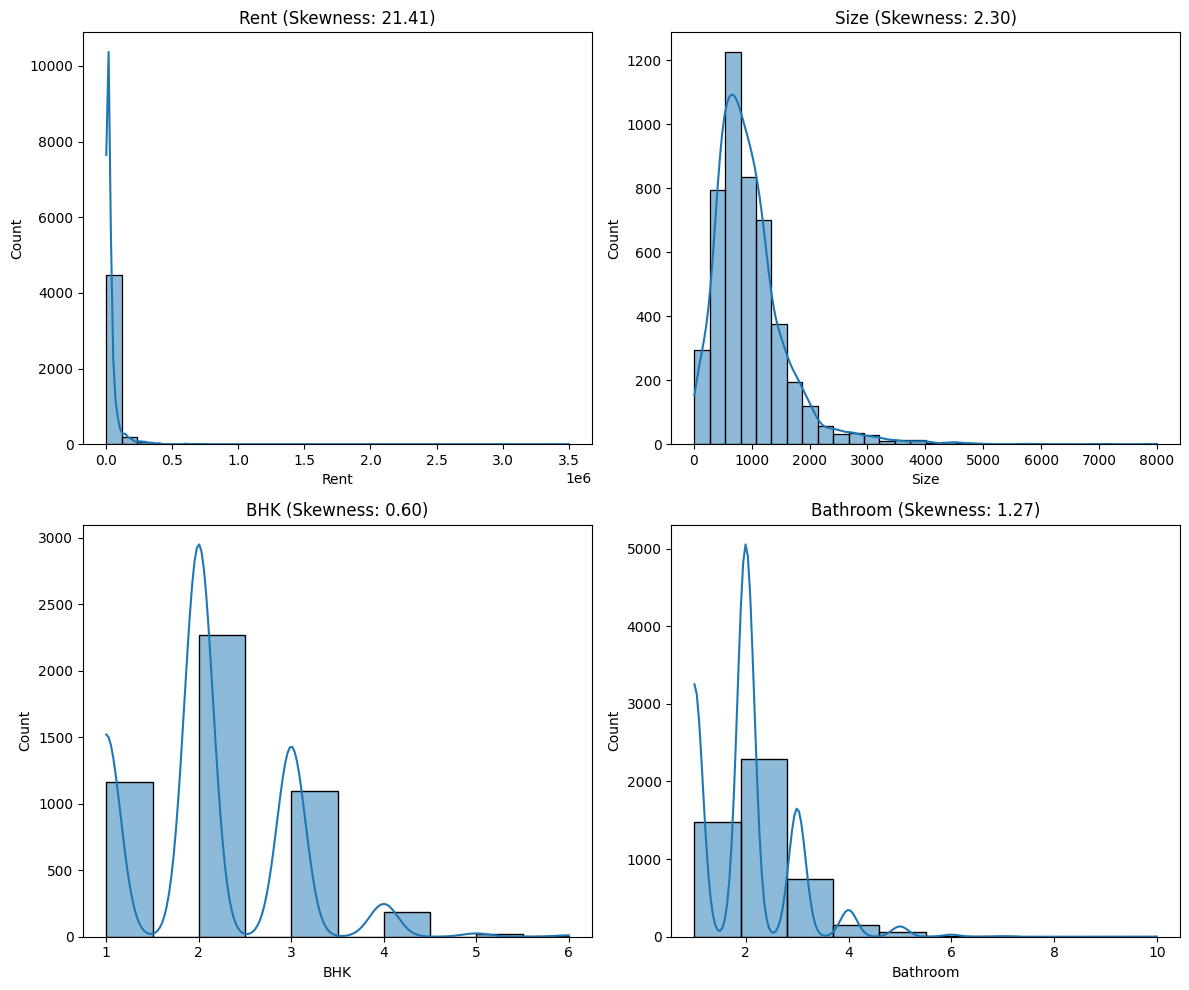

In [23]:
skewness = house_rent_data[['Rent', 'Size', 'BHK', 'Bathroom']].skew()
kurtosis = house_rent_data[['Rent', 'Size', 'BHK', 'Bathroom']].kurtosis()
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(house_rent_data['Rent'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title(f'Rent (Skewness: {skewness["Rent"]:.2f})')
sns.histplot(house_rent_data['Size'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title(f'Size (Skewness: {skewness["Size"]:.2f})')
sns.histplot(house_rent_data['BHK'], bins=10, kde=True, ax=axes[1, 0])
axes[1, 0].set_title(f'BHK (Skewness: {skewness["BHK"]:.2f})')
sns.histplot(house_rent_data['Bathroom'], bins=10, kde=True, ax=axes[1, 1])
axes[1, 1].set_title(f'Bathroom (Skewness: {skewness["Bathroom"]:.2f})')
plt.tight_layout()
plt.show()

In [33]:
print("Skewness")
print(f"{skewness}\n")
print("Kurtosis")
print(f"{kurtosis}")

Skewness
Rent        21.409942
Size         2.299892
BHK          0.599216
Bathroom     1.272951
dtype: float64

Kurtosis
Rent        841.108067
Size         11.028080
BHK           0.599223
Bathroom      3.605083
dtype: float64


In [25]:
from scipy.stats import ttest_ind, chi2_contingency
city1 = 'Bangalore'
city2 = 'Mumbai'
rent_city1 = house_rent_data[house_rent_data['City'] == city1]['Rent']
rent_city2 = house_rent_data[house_rent_data['City'] == city2]['Rent']
t_stat, p_value = ttest_ind(rent_city1, rent_city2, equal_var=False)
t_test_results = {
    't_statistic': t_stat,
    'p_value': p_value
}
contingency_table = pd.crosstab(house_rent_data['City'], house_rent_data['Furnishing Status'])
chi2_stat, chi2_p_value, dof, expected = chi2_contingency(contingency_table)
chi_square_test_results = {
    'chi2_statistic': chi2_stat,
    'p_value': chi2_p_value,
    'degrees_of_freedom': dof,
    'expected_frequencies': expected
}

t_test_results, chi_square_test_results


({'t_statistic': -11.59764559106685, 'p_value': 5.151134203822197e-30},
 {'chi2_statistic': 351.5570927729706,
  'p_value': 1.86182246860151e-69,
  'degrees_of_freedom': 10,
  'expected_frequencies': array([[126.94479562, 420.2246102 , 338.83059418],
         [127.66118837, 422.59608091, 340.74273072],
         [ 86.68352297, 286.94795617, 231.36852086],
         [124.36578171, 411.68731563, 331.94690265],
         [ 75.07796039, 248.53013064, 200.39190898],
         [139.26675095, 461.01390645, 371.7193426 ]])})

In [27]:
t_test_justification = "Rejected" if p_value < 0.05 else "Failed to reject"
t_test_hypothesis = f"Null Hypothesis (H0) is {t_test_justification}. The alternative hypothesis (H1) is {'justified' if t_test_justification == 'Rejected' else 'not justified'}, indicating that there is {'a significant' if t_test_justification == 'Rejected' else 'no significant'} difference in the mean rent prices between {city1} and {city2}."
chi_square_justification = "Rejected" if chi2_p_value < 0.05 else "Failed to reject"
chi_square_hypothesis = f"Null Hypothesis (H0) is {chi_square_justification}. The alternative hypothesis (H1) is {'justified' if chi_square_justification == 'Rejected' else 'not justified'}, indicating that there is {'a significant' if chi_square_justification == 'Rejected' else 'no significant'} association between the city and the furnishing status of the apartments."
t_test_hypothesis, chi_square_hypothesis

('Null Hypothesis (H0) is Rejected. The alternative hypothesis (H1) is justified, indicating that there is a significant difference in the mean rent prices between Bangalore and Mumbai.',
 'Null Hypothesis (H0) is Rejected. The alternative hypothesis (H1) is justified, indicating that there is a significant association between the city and the furnishing status of the apartments.')

Preprocess the data, including encoding categorical variables (string values converted to variables), and then split the dataset into training and testing sets

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
house_rent_data = house_rent_data.dropna(subset=['Rent', 'Size', 'BHK', 'Bathroom'])
X = house_rent_data[['Size', 'BHK', 'Bathroom', 'Area Type', 'City', 'Furnishing Status', 'Tenant Preferred']]
y = house_rent_data['Rent']
categorical_features = ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1915300006.75535
R-squared: 0.519418631662111


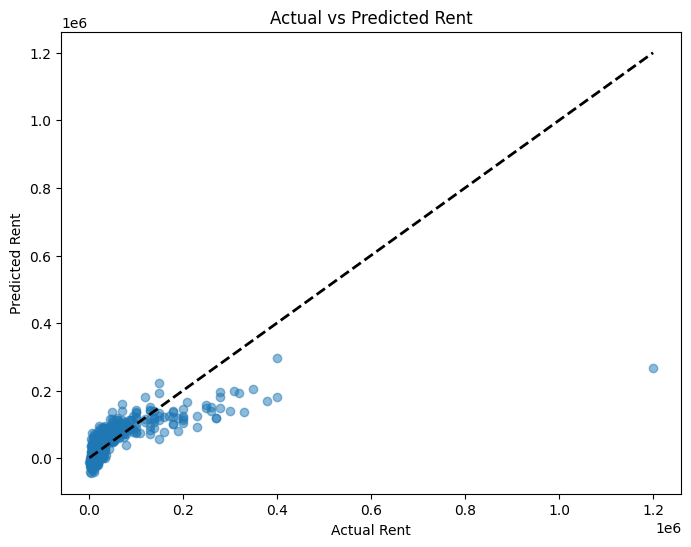

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title('Actual vs Predicted Rent')
plt.show()